In [1]:
import numpy as np
import pandas as pd
import re
import os
import glob
import seaborn as sns

#####proportions_1750_usa48.pro

In [44]:
print(os.getcwd())

run = 'parallel_new_input'
os.chdir('/home/smmrrr/TEM/TEM_Runs/'+run)
print(os.getcwd())
# os.listdir()

/home/smmrrr/TEM/TEM_Runs/parallel_new_input
/home/smmrrr/TEM/TEM_Runs/parallel_new_input


In [3]:
##make sure input files equal original files 
input_col_names = ["lon", 'lat','var' ,'Area', 'year', 'sum', 'max', 'average'
         , 'min', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
         , 'Nov', 'Dec', 'Area_Name']

output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
# ,'lc_state' ##I dont think this is included in this version of tem? check
,'silt_clay'
,'QC_Value'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']


In [60]:
# gpp = pd.read_csv('GPP_OPENN_LULC_EQPAST272', names = output_col_names)
gpp = pd.read_csv('GPP_LULCC.csv1836', names = output_col_names)

In [61]:
print(gpp.stand_age.unique())
print(gpp.cohort_number.unique().max())

[3000    0    1    2    3    4    5    6    7    8    9   10   11   12
   13   14   15   16   17   18   19   20   21   22   23   24   25   26
   27   28   29   30   31   32   33   34   35   36   37   38   39   40
   41   42   43   44   45   46   47   48   49   50   51   52   53   54
   55   56   57   58   59   60   61   62   63   64   65   66   67   68
   69   70   71   72   73   74   75   76   77   78   79   80   81   82
   83   84   85   86   87   88   89   90   91   92   93   94   95   96
   97   98   99  100  101  102  103  104  105  106  107  108  109  110
  111  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  128  129  130  131  132  133  134  135  136  137  138
  139  140  141  142  143  144  145  146  147  148  149  150  151  152
  153  154  155  156  157  158  159  160  161  162  163  164  165  166
  167  168  169  170  171  172  173  174  175  176  177  178  179  180
  181  182  183  184  185  186  187  188  189  190  191  192  193  194
  195 

In [73]:
gpp.loc[gpp['year'] == 1751]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
2,-98.0,44.0,GPP,1,3000,12,12,12,7,55.20,...,13.13,28.55,54.30,75.67,79.82,67.70,39.47,6.38,0.49,United_States_of_America
3,-98.0,44.0,GPP,2,1,51,51,51,18,55.20,...,0.00,0.00,31.84,36.74,36.49,30.71,18.05,0.00,0.00,United_States_of_America
36662,-98.0,44.5,GPP,1,3000,12,12,12,7,63.04,...,11.18,24.52,49.08,70.39,74.23,62.74,31.00,3.83,0.00,United_States_of_America
36663,-98.0,44.5,GPP,2,1,51,51,51,18,63.04,...,0.00,0.00,20.02,22.97,22.81,19.24,9.29,0.00,0.00,United_States_of_America
71064,-98.0,45.0,GPP,1,3000,12,12,12,7,67.75,...,10.47,21.63,46.19,69.01,73.61,60.33,27.74,3.95,0.00,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913142,-97.0,33.5,GPP,1,3000,31,31,13,8,64.56,...,199.12,273.80,222.94,189.17,153.79,85.63,90.78,40.11,25.46,United_States_of_America
2913143,-97.0,33.5,GPP,2,3000,31,31,10,6,64.56,...,61.71,185.46,304.65,309.40,236.08,53.65,105.09,11.60,0.51,United_States_of_America
2913144,-97.0,33.5,GPP,3,1,50,50,50,15,64.56,...,17.16,50.17,88.45,63.34,37.84,52.72,57.22,2.10,0.46,United_States_of_America
2913145,-97.0,33.5,GPP,4,1,51,51,51,18,64.56,...,42.50,52.40,52.45,55.29,55.95,51.55,44.01,19.85,14.14,United_States_of_America


In [78]:
gpp.loc[(gpp['lon'] == -97.5) &
        (gpp['lat'] == 28.0) &
        (gpp['year'] < 1752)
        # (gpp['cohort_number'] == 3)
        , ['lon', 'lat', 'stand_age', 'year', 'current_veg', 'cohort_number','potential_veg', 'cohort_area']]

,lon,lat,stand_age,year,current_veg,cohort_number,potential_veg,cohort_area
498173,-97.5,28.0,3000,1750,12,1,12,2641
498174,-97.5,28.0,0,1750,51,2,51,81
498175,-97.5,28.0,3000,1751,12,1,12,2640
498176,-97.5,28.0,1,1751,51,2,51,81
498177,-97.5,28.0,500,1751,51,3,12,1


In [79]:
gpp.loc[
        (gpp['stand_age'] == 500 
        )
        # (gpp['cohort_number'] == 3)
        , ['lon', 'lat', 'stand_age', 'year', 'current_veg', 'cohort_number','potential_veg', 'cohort_area']]

,lon,lat,stand_age,year,current_veg,cohort_number,potential_veg,cohort_area
498177,-97.5,28.0,500,1751,51,3,12,1
547569,-97.5,28.5,500,1751,51,3,10,1
597470,-97.5,29.0,500,1751,51,4,31,1
646878,-97.5,29.5,500,1751,51,3,10,1
850054,-97.5,31.5,500,1751,51,5,31,1
906255,-97.5,32.0,500,1751,51,5,31,1
1023509,-97.5,33.0,500,1751,51,4,12,1
1081592,-97.5,33.5,500,1751,51,4,12,1
1134531,-97.5,34.0,500,1751,51,5,31,1
1182075,-97.5,34.5,500,1751,51,5,31,1


<AxesSubplot:xlabel='stand_age', ylabel='monthly_mean'>

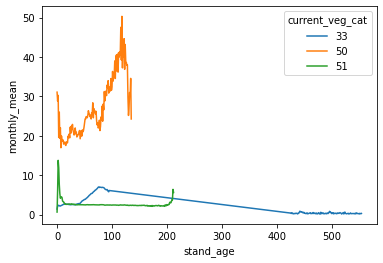

In [37]:
gpp['current_veg_cat'] = gpp['current_veg'].astype(str)

plot_nep_timeseries = gpp.loc[(gpp['lon'] == -121.5) & (gpp['lat'] == 39.0)].groupby(['stand_age', 'current_veg_cat']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries.loc[plot_nep_timeseries['stand_age'] != 3000]
             , x="stand_age", y = 'monthly_mean', hue = 'current_veg_cat') ##why does stand age jump from 200 - 500?

<AxesSubplot:xlabel='year', ylabel='stand_age'>

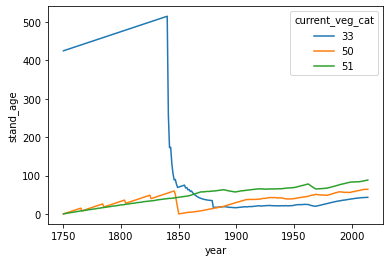

In [38]:

plot_nep_timeseries = gpp.loc[(gpp['stand_age'] != 3000) & (gpp['lon'] == -121.5) & (gpp['lat'] == 39.0)].groupby(['year', 'current_veg_cat']).agg(stand_age=('stand_age', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries.loc[plot_nep_timeseries['stand_age'] != 3000]
             , x="year", y = 'stand_age', hue = 'current_veg_cat') ##why does stand age jump from 200 - 500?

In [49]:
wm_cohort = lambda x: np.average(x, weights=gpp.loc[x.index, "cohort_area"])  # https://stackoverflow.com/questions/31521027/groupby-weighted-average-and-sum-in-pandas-dataframe

stand_age_agg_year = gpp.loc[(gpp['lon'] == -121.5) & (gpp['lat'] == 39.0), ['year', 'current_veg', 'cohort_number', 'cohort_area','stand_age']]


stand_age_agg_year = stand_age_agg_year.groupby([
    'current_veg','year']).agg(stand_age = ('stand_age', wm_cohort)         )




In [51]:
stand_age_agg_year = stand_age_agg_year.reset_index()

<AxesSubplot:xlabel='year', ylabel='stand_age'>

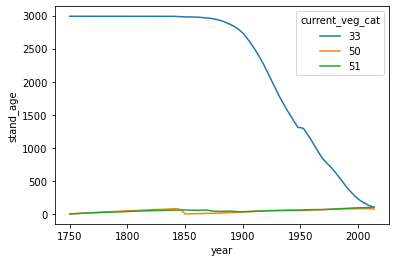

In [53]:
stand_age_agg_year
stand_age_agg_year['current_veg_cat'] = stand_age_agg_year['current_veg'].astype(str)


sns.lineplot(data=stand_age_agg_year
             , x="year", y = 'stand_age', hue = 'current_veg_cat') ##why does stand age jump from 200 - 500?

In [6]:
gpp.loc[gpp['Apr'] == -999999.9].current_veg.unique()

array([], dtype=int64)

In [7]:
gpp.loc[gpp['Apr'] != -999999.9].current_veg.unique()

array([12, 51, 50, 48, 28, 10, 31])

In [9]:
gpp.loc[gpp['Apr'] == -999999.9].lon.count()

0

In [10]:
(gpp.loc[gpp['Apr'] == -999999.9].lon.astype(str) + ' ' + gpp.loc[gpp['Apr'] == -999999.9].lat.astype(str)).unique()

array([], dtype=object)

In [35]:
(gpp.loc[gpp['Apr'] == -999999.9].lon.astype(str) + ' ' + gpp.loc[gpp['Apr'] == -999999.9].lat.astype(str)
+' ' + gpp.loc[gpp['Apr'] == -999999.9].year.astype(str) ).unique()

array(['-125.0 42.5 1701', '-125.0 42.5 1702', '-125.0 42.5 1703', ...,
       '-123.0 42.5 2009', '-123.0 42.5 2010', '-123.0 42.5 2011'],
      dtype=object)

In [25]:
gpp.loc[gpp['Apr'] != -999999.9].lon.count()

1870040

In [26]:
gpp.lon.count()

2086075

In [16]:
nep = gpp

<AxesSubplot:xlabel='year', ylabel='monthly_mean'>

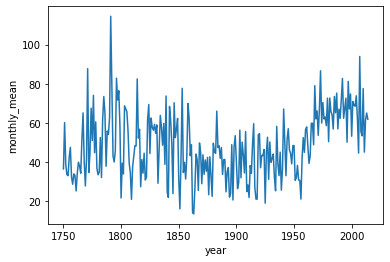

In [8]:
plot_nep_timeseries = gpp.groupby(['year']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries #.loc[plot_nep_timeseries['year'] != 2011]
             , x="year", y = 'monthly_mean')

In [22]:


plot_nep_timeseries = nep.groupby(['stand_age']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
    sns.lineplot(data=plot_nep_timeseries.loc[(plot_nep_timeseries['stand_age'] != 3000) & (plot_nep_timeseries['current_veg'] == veg_type)]
                 , x="stand_age", y = 'monthly_mean') ##why does stand age jump from 200 - 500?

array([12, 51, 50, 48, 28, 10, 31])

12
51
50
48
28
10
31


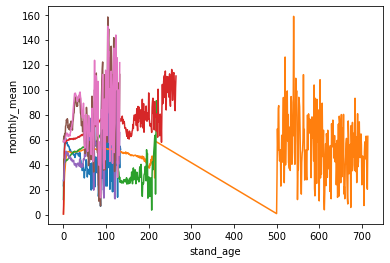

In [16]:
for veg_type in (gpp.current_veg.unique()):
    print(veg_type)
    plot_nep_timeseries = gpp.loc[(gpp['current_veg'] == veg_type)].groupby(['stand_age', 'current_veg']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
    sns.lineplot(data=plot_nep_timeseries.loc[(plot_nep_timeseries['stand_age'] != 3000)  ]
                 , x="stand_age", y = 'monthly_mean') ##why does stand age jump from 200 - 500?
    
    
    

<AxesSubplot:xlabel='stand_age', ylabel='monthly_mean'>

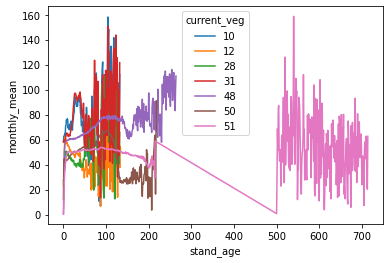

In [19]:
gpp['current_veg'] = gpp['current_veg'].astype(str)

plot_nep_timeseries = gpp.groupby(['stand_age', 'current_veg']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries.loc[plot_nep_timeseries['stand_age'] != 3000]
             , x="stand_age", y = 'monthly_mean', hue = 'current_veg') ##why does stand age jump from 200 - 500?

<AxesSubplot:xlabel='stand_age', ylabel='monthly_mean'>

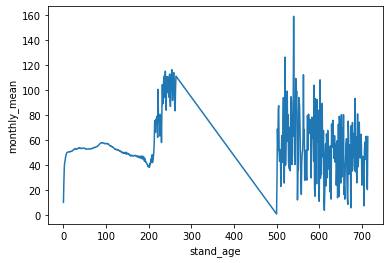

In [9]:
plot_nep_timeseries = gpp.groupby(['stand_age']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries.loc[plot_nep_timeseries['stand_age'] != 3000]
             , x="stand_age", y = 'monthly_mean')

In [14]:
gpp

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-98.0,44.0,NEP,1,3000,12,12,12,7,55.20,...,-4.26,0.66,4.57,-0.25,5.97,18.46,9.23,-8.02,-7.21,United_States_of_America
1,-98.0,44.0,NEP,2,0,51,51,51,18,55.20,...,-5.10,8.75,9.21,4.79,7.62,12.92,7.12,-1.44,-0.73,United_States_of_America
2,-98.0,44.0,NEP,1,3000,12,12,12,7,55.20,...,-7.46,-4.98,-1.95,4.68,13.79,0.40,9.64,-6.15,-8.31,United_States_of_America
3,-98.0,44.0,NEP,2,1,51,51,51,18,55.20,...,-4.43,-6.76,7.17,6.65,8.72,2.88,5.73,-1.90,-1.08,United_States_of_America
4,-98.0,44.0,NEP,1,3000,12,12,12,7,55.20,...,-4.61,-2.62,-6.60,-2.18,11.07,21.90,7.34,-7.18,-6.19,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968029,-97.0,33.5,NEP,451,2,31,31,10,6,64.56,...,-9.87,-13.50,-17.86,-18.38,-20.27,-15.74,-11.18,-4.61,-4.02,United_States_of_America
2968030,-97.0,33.5,NEP,452,1,31,51,51,18,64.56,...,-27.31,-34.86,-43.50,-40.11,-42.78,-24.75,-7.39,-2.88,-8.35,United_States_of_America
2968031,-97.0,33.5,NEP,453,0,31,51,51,18,64.56,...,-5.60,-8.11,-11.21,-11.65,-12.30,-9.63,-7.26,-3.14,-2.78,United_States_of_America
2968032,-97.0,33.5,NEP,454,0,31,31,10,6,64.56,...,-6.21,-8.61,-11.33,-11.64,-12.60,-9.92,-7.39,-3.17,-2.80,United_States_of_America


In [4]:
clds = pd.read_csv('/home/smmrrr/TEM/TEM_input_files/climate/clds_millennial_hurtt.usa48', names = input_col_names)
clds.loc[clds[]]

,lon,lat,var,Area,year,sum,max,average,min,Jan,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Area_Name
0,-125.0,42.5,CLDINESS,2261,1700,776.4,88.4,64.70,35.9,70.3,...,53.0,53.3,61.4,35.9,54.3,59.4,69.4,73.7,88.4,NAMERICA
1,-125.0,42.5,CLDINESS,2261,1701,873.7,91.5,72.81,39.2,91.5,...,52.4,73.3,71.6,52.4,39.2,87.5,75.4,84.4,82.2,NAMERICA
2,-125.0,42.5,CLDINESS,2261,1702,801.8,90.7,66.82,30.3,70.5,...,70.4,67.6,57.4,30.3,58.7,50.1,70.1,78.0,73.0,NAMERICA
3,-125.0,42.5,CLDINESS,2261,1703,794.5,85.8,66.21,19.1,61.4,...,54.9,60.1,85.0,85.8,51.1,19.1,63.8,75.4,74.9,NAMERICA
4,-125.0,42.5,CLDINESS,2261,1704,699.3,90.8,58.28,21.5,90.8,...,85.3,70.3,27.1,50.5,21.5,29.1,40.0,63.1,86.6,NAMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054867,-67.5,44.5,CLDINESS,2187,2007,757.2,68.4,63.10,56.2,64.6,...,67.0,62.8,62.8,63.7,58.4,56.2,56.3,68.4,65.2,NAMERICA
1054868,-67.5,44.5,CLDINESS,2187,2008,765.5,70.0,63.79,57.8,63.3,...,63.6,61.8,69.6,64.5,65.2,57.8,60.4,70.0,63.4,NAMERICA
1054869,-67.5,44.5,CLDINESS,2187,2009,768.2,72.4,64.02,54.0,60.4,...,64.1,62.4,69.0,68.7,61.0,54.0,63.4,66.2,72.4,NAMERICA
1054870,-67.5,44.5,CLDINESS,2187,2010,791.3,75.8,65.94,55.0,69.4,...,62.8,61.0,68.0,63.9,55.0,65.0,62.7,70.3,72.6,NAMERICA


<AxesSubplot:xlabel='year', ylabel='monthly_mean'>

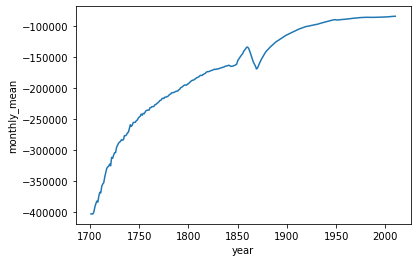

In [30]:
plot_nep_timeseries = gpp.groupby(['year']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_nep_timeseries.loc[plot_nep_timeseries['year'] != 2011]
             , x="year", y = 'monthly_mean')

In [28]:
np.unique((gpp['lon']) + str(gpp['lat']))

array(['0        -123.0\n1        -123.0\n2        -123.0\n3        -123.0\n4        -123.0\n          ...  \n361144   -123.0\n361145   -123.0\n361146   -123.0\n361147   -123.0\n361148   -123.0\nName: lon, Length: 361149, dtype: float640         43.0\n1         43.0\n2         43.0\n3         43.0\n4         43.0\n          ... \n361144    46.5\n361145    46.5\n361146    46.5\n361147    46.5\n361148    46.5\nName: lat, Length: 361149, dtype: float64'],
      dtype='<U423')

In [8]:
ws10 = pd.read_csv('/home/smmrrr/TEM/TEM_input_files/climate/windr_hurtt.usa48'
                  ,names = input_col_names)
ws10

,lon,lat,var,Area,year,sum,max,average,min,Jan,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Area_Name
0,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
1,-125.0,47.5,WIND,234,-999,52.3,4.7,4.36,3.6,4.7,...,4.6,4.3,4.4,4.1,3.8,3.6,4.0,4.7,4.7,GLOBE
2,-125.0,48.0,WIND,961,-999,46.8,4.3,3.90,3.2,4.1,...,4.2,3.9,3.9,3.7,3.3,3.2,3.6,4.2,4.3,GLOBE
3,-124.5,40.0,WIND,1846,-999,45.9,4.5,3.83,3.1,3.1,...,4.3,4.4,4.5,4.4,4.1,3.7,3.3,3.2,3.2,GLOBE
4,-124.5,40.5,WIND,1562,-999,45.2,4.4,3.77,3.1,3.1,...,4.2,4.3,4.4,4.3,4.0,3.6,3.3,3.2,3.2,GLOBE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,-68.0,44.0,WIND,282,-999,52.6,5.1,4.38,3.5,4.9,...,4.9,4.4,4.0,3.7,3.5,3.7,4.1,4.6,4.8,GLOBE
3377,-68.0,44.5,WIND,2195,-999,50.0,4.9,4.17,3.3,4.6,...,4.7,4.3,3.8,3.5,3.3,3.5,4.0,4.3,4.4,GLOBE
3378,-68.0,45.0,WIND,2176,-999,48.3,4.8,4.02,3.3,4.4,...,4.6,4.1,3.7,3.4,3.3,3.4,3.8,4.1,4.3,GLOBE
3379,-68.0,45.5,WIND,2157,-999,47.4,4.7,3.95,3.2,4.3,...,4.5,4.1,3.7,3.3,3.2,3.3,3.8,4.0,4.1,GLOBE


In [9]:
clouds = pd.read_csv('/home/smmrrr/TEM/TEM_input_files/climate/clds_millennial_hurtt.usa48'
                  ,names = input_col_names)

clouds

,lon,lat,var,Area,year,sum,max,average,min,Jan,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Area_Name
0,-125.0,42.5,CLDINESS,2261,1700,776.4,88.4,64.70,35.9,70.3,...,53.0,53.3,61.4,35.9,54.3,59.4,69.4,73.7,88.4,NAMERICA
1,-125.0,42.5,CLDINESS,2261,1701,873.7,91.5,72.81,39.2,91.5,...,52.4,73.3,71.6,52.4,39.2,87.5,75.4,84.4,82.2,NAMERICA
2,-125.0,42.5,CLDINESS,2261,1702,801.8,90.7,66.82,30.3,70.5,...,70.4,67.6,57.4,30.3,58.7,50.1,70.1,78.0,73.0,NAMERICA
3,-125.0,42.5,CLDINESS,2261,1703,794.5,85.8,66.21,19.1,61.4,...,54.9,60.1,85.0,85.8,51.1,19.1,63.8,75.4,74.9,NAMERICA
4,-125.0,42.5,CLDINESS,2261,1704,699.3,90.8,58.28,21.5,90.8,...,85.3,70.3,27.1,50.5,21.5,29.1,40.0,63.1,86.6,NAMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054867,-67.5,44.5,CLDINESS,2187,2007,757.2,68.4,63.10,56.2,64.6,...,67.0,62.8,62.8,63.7,58.4,56.2,56.3,68.4,65.2,NAMERICA
1054868,-67.5,44.5,CLDINESS,2187,2008,765.5,70.0,63.79,57.8,63.3,...,63.6,61.8,69.6,64.5,65.2,57.8,60.4,70.0,63.4,NAMERICA
1054869,-67.5,44.5,CLDINESS,2187,2009,768.2,72.4,64.02,54.0,60.4,...,64.1,62.4,69.0,68.7,61.0,54.0,63.4,66.2,72.4,NAMERICA
1054870,-67.5,44.5,CLDINESS,2187,2010,791.3,75.8,65.94,55.0,69.4,...,62.8,61.0,68.0,63.9,55.0,65.0,62.7,70.3,72.6,NAMERICA


In [14]:
n_repeat = len(clouds.year.unique())

new_ws10 = pd.DataFrame(np.repeat(ws10.values, n_repeat, axis=0))
new_ws10

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
1,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
2,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
3,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
4,-125.0,42.5,WIND,503,-999,47.1,4.2,3.93,3.5,3.7,...,4.2,4.2,4.2,4.2,3.9,3.6,3.5,3.7,3.7,GLOBE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054867,-67.5,44.5,WIND,1547,-999,50.6,4.9,4.22,3.4,4.7,...,4.7,4.3,3.8,3.5,3.4,3.6,4.0,4.4,4.6,GLOBE
1054868,-67.5,44.5,WIND,1547,-999,50.6,4.9,4.22,3.4,4.7,...,4.7,4.3,3.8,3.5,3.4,3.6,4.0,4.4,4.6,GLOBE
1054869,-67.5,44.5,WIND,1547,-999,50.6,4.9,4.22,3.4,4.7,...,4.7,4.3,3.8,3.5,3.4,3.6,4.0,4.4,4.6,GLOBE
1054870,-67.5,44.5,WIND,1547,-999,50.6,4.9,4.22,3.4,4.7,...,4.7,4.3,3.8,3.5,3.4,3.6,4.0,4.4,4.6,GLOBE


In [26]:
n_repeat

312

In [20]:
new_ws10.to_csv( '/home/smmrrr/TEM/TEM_input_files/climate/windr_expanded.usa48', header = False, index = False) 


In [23]:
maxcohorts = pd.read_csv('/home/smmrrr/TEM/TEM_input_files/lulcc/cruHurtt3.2.1mxcohrtsr_hurtt_1700_2011.usa48'
                        )
                         # ,names = input_col_names)

maxcohorts

,-125.0000,42.5000,MXCOHRTS,503,1700,2,1,North_America
0,-125.0,42.5,MXCOHRTS,503,1701,2,1,North_America
1,-125.0,42.5,MXCOHRTS,503,1702,2,1,North_America
2,-125.0,42.5,MXCOHRTS,503,1703,2,1,North_America
3,-125.0,42.5,MXCOHRTS,503,1704,2,1,North_America
4,-125.0,42.5,MXCOHRTS,503,1705,2,1,North_America
...,...,...,...,...,...,...,...,...
1054866,-67.5,44.5,MXCOHRTS,1547,2007,339,1,North_America
1054867,-67.5,44.5,MXCOHRTS,1547,2008,340,1,North_America
1054868,-67.5,44.5,MXCOHRTS,1547,2009,342,1,North_America
1054869,-67.5,44.5,MXCOHRTS,1547,2010,343,1,North_America


In [20]:

tair = pd.read_csv('TAIR.HVD68', names = input_col_names)
tair
tair.loc[(tair['lon'] == -123.0) & (tair['lat'] == 43.0), 'year']

0      1700
1      1701
2      1702
3      1703
4      1704
       ... 
307    2007
308    2008
309    2009
310    2010
311    2011
Name: year, Length: 312, dtype: int64

In [25]:
len(tair.year.unique())

311

In [9]:
tair['lat'].unique()

array([42.5])

In [18]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
# ,'lc_state' ##I dont think this is included in this version of tem? check
,'silt_clay'
,'QC_Value'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']
npp = pd.read_csv('NPP_OPENN_LULC_EQPAST0', names = output_col_names)
npp.loc[1]

lon                                   -125.0
lat                                     42.5
variable                                NPP 
cohort_number                              1
stand_age                               3000
potential_veg                              9
current_veg                                9
subtype                                    9
community_type                             5
silt_clay                              66.09
QC_Value                                   1
land_area                                503
cohort_area                              500
year                                    1701
annual_sum                             721.3
monthly_maximum                        129.0
monthly_mean                           60.11
monthly_minimum                         -1.1
Jan                                     3.47
Feb                                    15.48
Mar                                    48.21
Apr                                    91.87
May       

In [24]:
npp.groupby(['lat', 'lon'])['monthly_mean'].mean()
# npp['monthly_mean'].mean()

lat   lon   
42.5  -125.0   -27536.967345
Name: monthly_mean, dtype: float64

<AxesSubplot:xlabel='year', ylabel='monthly_mean'>

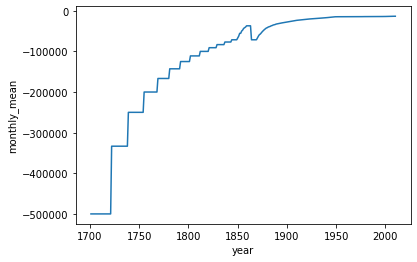

In [41]:
plot_npp_timeseries = npp.groupby(['year']).agg(monthly_mean=('monthly_mean', 'mean')).reset_index()
sns.lineplot(data=plot_npp_timeseries.loc[plot_npp_timeseries['year'] != 2011]
             , x="year", y = 'monthly_mean')